In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('data\heart.csv')

# Exploring The Data

In [12]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [14]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

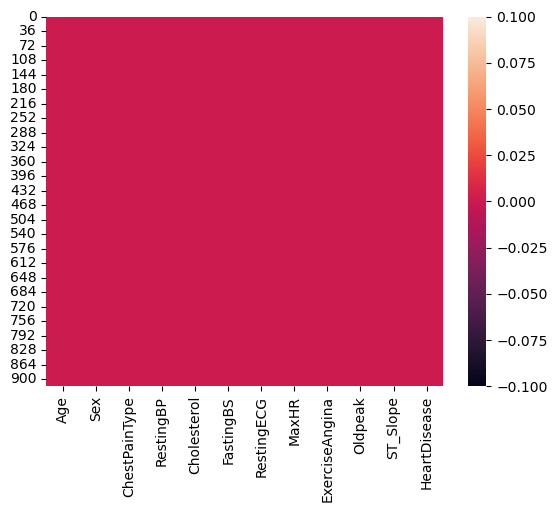

In [16]:
sns.heatmap(data.isnull())

In [17]:
data.duplicated().sum()

0

# Analyse the data

In [18]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

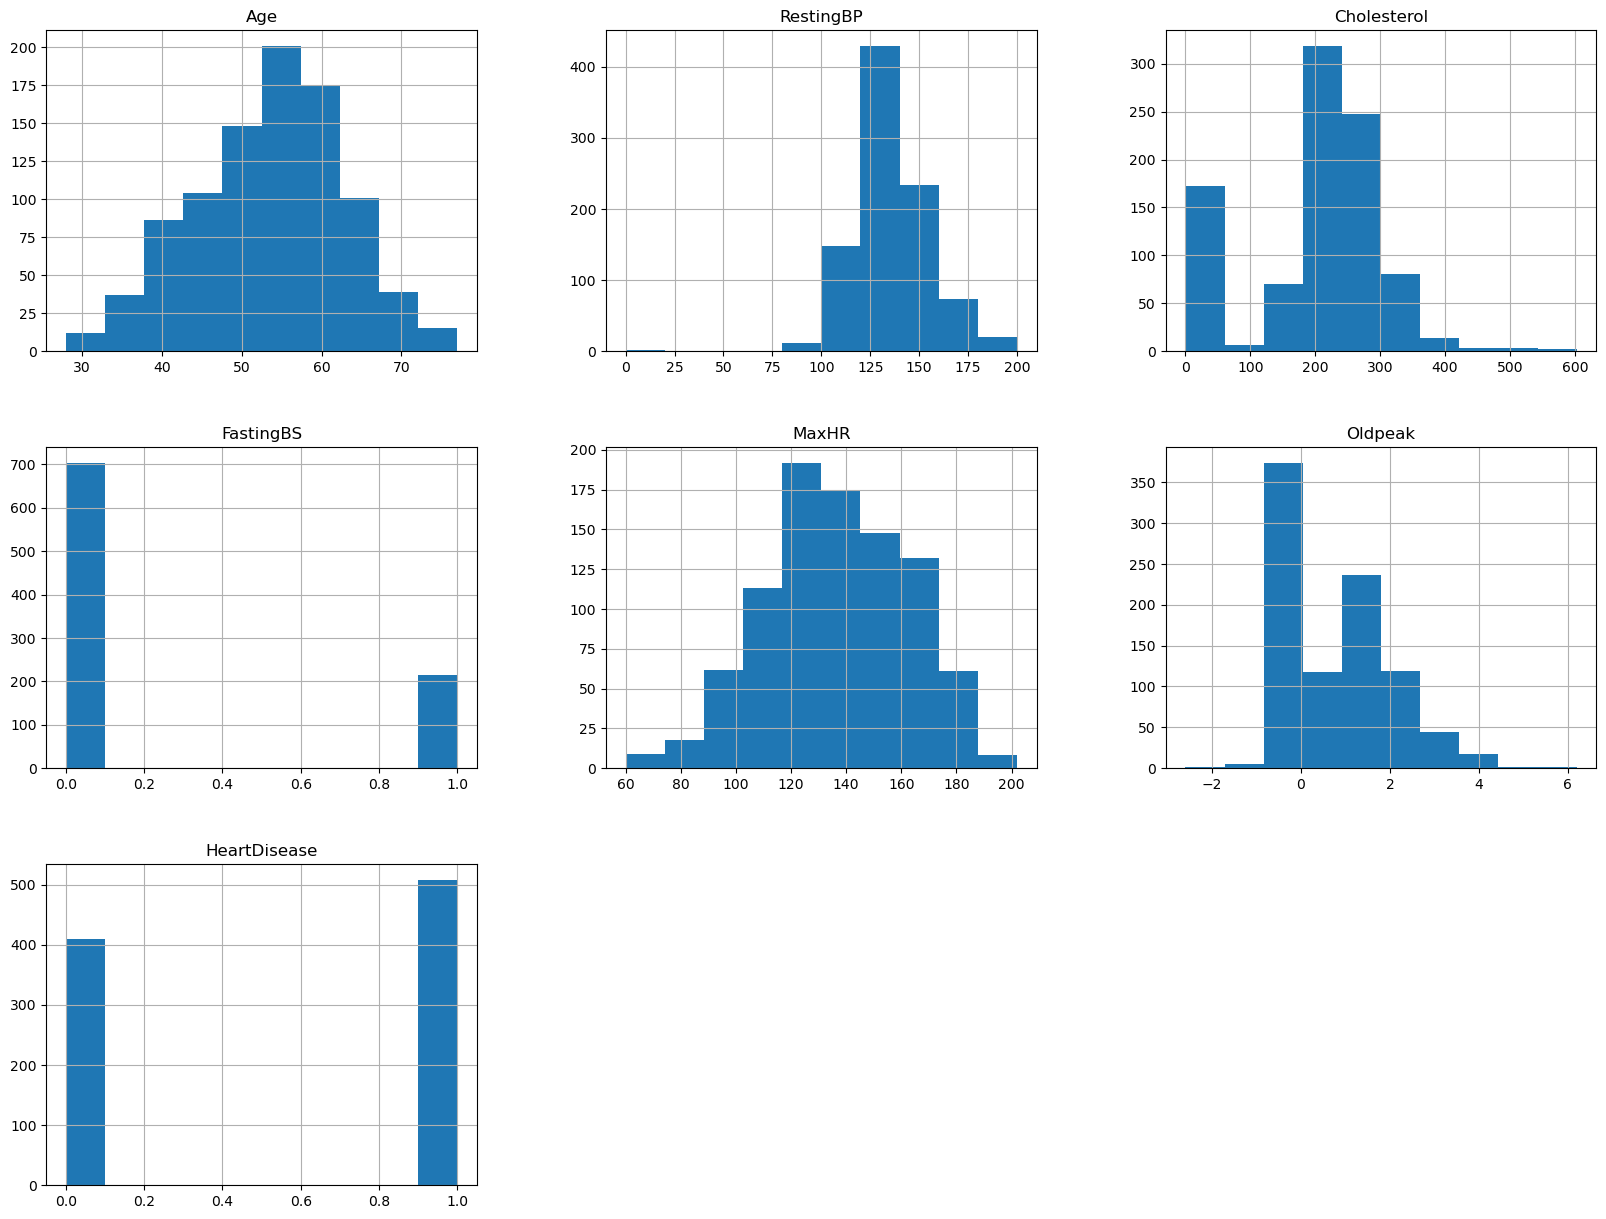

In [19]:
data.hist(figsize=(20,15))
plt.show()

C:\Users\Elkady\AppData\Local\Temp\ipykernel_5256\588081868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

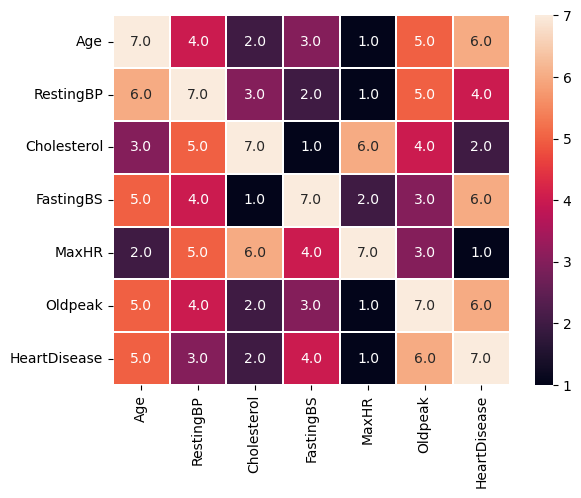

In [20]:
cor = data.corr()
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f',linewidth=.3)

# Processing Data

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
lab = LabelEncoder()

# Function to apply label encoding to a DataFrame column
def label_encode_column(df, column_name):
    if df[column_name].dtype == 'object':
        df[column_name] = lab.fit_transform(df[column_name])

# Loop through columns and apply label encoding to each
for column_name in data.columns:
    label_encode_column(data, column_name)


In [22]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Modelling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.svm             import SVC
from sklearn.naive_bayes     import GaussianNB 
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import GradientBoostingClassifier

from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import classification_report

In [24]:
x = data.drop(['HeartDisease'],axis=1)
y = data['HeartDisease']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
models =[KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),
         RandomForestClassifier(),GradientBoostingClassifier()]

In [27]:
def evaluate_models(models, x_train, y_train, x_test, y_test):
    for model in models:
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        print(f"Model: {type(model).__name__}")
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
        print("\n")

In [28]:
# Call the function to evaluate all models
evaluate_models(models, x_train, y_train, x_test, y_test)

Model: KNeighborsClassifier
[[55 22]
 [33 74]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        77
           1       0.77      0.69      0.73       107

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.70      0.70       184



Model: DecisionTreeClassifier
[[65 12]
 [24 83]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



Model: SVC
[[54 23]
 [35 72]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       18

# Improve Model

In [51]:
best_accuracy = 0  # Initialize with a low value
best_n_estimators = 0


In [53]:
for i in range(10, 110, 10):
    print(f'Trying model with {i} estimators...')
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test) * 100
    print(f"Model accuracy on test set: {accuracy:.2f}%")

    # Check if the current model has a better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = i

print(f"The best model has {best_n_estimators} estimators and an accuracy of {best_accuracy:.2f}%")


Trying model with 10 estimators...
Model accuracy on test set: 84.24%
Trying model with 20 estimators...
Model accuracy on test set: 86.41%
Trying model with 30 estimators...
Model accuracy on test set: 88.59%
Trying model with 40 estimators...
Model accuracy on test set: 88.04%
Trying model with 50 estimators...
Model accuracy on test set: 89.13%
Trying model with 60 estimators...
Model accuracy on test set: 88.04%
Trying model with 70 estimators...
Model accuracy on test set: 89.13%
Trying model with 80 estimators...
Model accuracy on test set: 88.04%
Trying model with 90 estimators...
Model accuracy on test set: 87.50%
Trying model with 100 estimators...
Model accuracy on test set: 88.59%
The best model has 50 estimators and an accuracy of 90.76%


In [41]:
#Save and load the Model
import pickle

pickle.dump(model,open('random_forest_model,pkl','wb'))

In [42]:
loaded_data = pickle.load(open('random_forest_model,pkl','rb'))

In [55]:
loaded_data.score(x_test,y_test)

0.8967391304347826

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [61]:
print(confusion_matrix(y_test,pred))

[[69  8]
 [13 94]]
